## Dependencias

In [1]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install giotto-tda
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (68.9 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 157604 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2

In [2]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

## Datasets

Los datasets usados corresponden a: 

| **Variable**                | **Statistic**           | **Level**       | **Time Scale** |
|-----------------------------|-------------------------|-----------------|----------------|
| Upward Solar Radiation Flux | Mean                    | Surface         | Monthly        |
| Air Temperature             | Individual Observations | Pressure Levels | Monthly        |
| Air temperature| Mean| 2m|Monthly|
|Water runnof 2021| Individual obs|Surface|Daily


In [108]:
airtemp = xr.open_mfdataset('air.mon.mean.nc')
airtemp2m = xr.open_mfdataset('air.2m.mon.mean.nc')
solarradiation = xr.open_mfdataset('ulwrf.sfc.mon.mean.nc')
runnof2021  = xr.open_mfdataset('runof.sfc.gauss.2021.nc')

### Temperaturas del aire lectura mensual por niveles de presion

In [109]:
airtemp

<xarray.Dataset>
Dimensions:    (level: 17, lat: 73, lon: 144, time: 524, nbnds: 2)
Coordinates:
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-08-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] dask.array<chunksize=(524, 2), meta=np.ndarray>
    air        (time, level, lat, lon) float32 dask.array<chunksize=(524, 17, 73, 144), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

Contamos con 17 niveles de presion, 73 latitudes distintas, 144 longitudes distitnas y 524 estampas de tiempo

### Temperaturas del aire media mensual medida a 2 metros de altura

In [110]:
airtemp2m

<xarray.Dataset>
Dimensions:    (level: 1, lat: 94, lon: 192, time: 524, nbnds: 2)
Coordinates:
  * level      (level) float32 2.0
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-08-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] dask.array<chunksize=(524, 2), meta=np.ndarray>
    air        (time, level, lat, lon) float32 dask.array<chunksize=(524, 1, 94, 192), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

Contamos con 94 latitudes distintas, 192 longitudes, y 524 estampas de tiempo

### Radiacion solar

In [ ]:
solarradiation

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, time: 524, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-08-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] dask.array<chunksize=(524, 2), meta=np.ndarray>
    ulwrf      (time, lat, lon) float32 dask.array<chunksize=(524, 94, 192), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

Contamos con 94 latitudes distintas, 192 longitudes, y 524 estampas de tiempo

## Acumulación de 6 horas de corrida de agua en la superficie 2021

In [14]:
runnof2021

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, time: 1460, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-12-31T18:00:00
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] dask.array<chunksize=(1460, 2), meta=np.ndarray>
    runof      (time, lat, lon) float32 dask.array<chunksize=(1460, 94, 192), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.0
    title:          4x Daily NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2021/02 by NOAA/ESRL/PSD\nConverted to chunked, d...

Contamos con 94 latitudes distintas, 192 longitudes, y 1460 estampas de tiempo

## EDA

### Temperatura del aire

A continuacion se muestra un plot por nivel de presion para la temperatura media del aire a traves de toda la serie de tiempo

In [20]:
def pressureLevelPlotter(level: int=0):
  import warnings
  warnings.filterwarnings("ignore")
  '''Plottea el nivel de presion especificado'''
  fig = plt.figure(figsize=(10,10))
  ax = plt.axes(projection=ccrs.Robinson())
  ax.set_global()
  cl = ax.coastlines()
  longitude = airtemp.lon
  latitude = airtemp.lat
  dataarray = airtemp.air.isel(level=level).mean(dim = 'time')[:,:].compute()
  mesh = ax.pcolormesh(longitude, latitude, dataarray, transform = ccrs.PlateCarree(),cmap = 'jet',)
  plt.title(f'Promedio de temperatura mensual para nivel de presion '+str(level+1))
  plt.colorbar(mesh, orientation = 'horizontal')
  ax.add_feature(cf.BORDERS)
  return fig

In [21]:
def die2dPlotterZeug(x)-> None:
  for i in range(x):
    fig=pressureLevelPlotter(i)
    fig.show()

In [22]:
die2dPlotterZeug(17)

Output hidden; open in https://colab.research.google.com to view.

In [52]:
def encajes(arr:np.ndarray):
  '''Encaja la variable de n*1 y obtiene su nube de puntos en 3d'''
  from gtda.time_series import SingleTakensEmbedding
  embedding_dimension = 50
  embedding_time_delay = 10
  stride = 1

  embedder = SingleTakensEmbedding(
      parameters_type="search", 
      time_delay=embedding_time_delay, 
      dimension=embedding_dimension, 
      stride=stride
  )

  y_gw_embedded = embedder.fit_transform(arr)

  from sklearn.decomposition import PCA
  from gtda.plotting import plot_point_cloud

  pca = PCA(n_components=3)
  y_gw_embedded_pca = pca.fit_transform(y_gw_embedded)

  return plot_point_cloud(y_gw_embedded_pca)

### Radiacion solar 

In [113]:
def SRPlotter(data):
  import warnings
  warnings.filterwarnings("ignore")
  '''Plottea el nivel de presion especificado'''
  fig = plt.figure(figsize=(10,10))
  ax = plt.axes(projection=ccrs.Robinson())
  ax.set_global()
  cl = ax.coastlines()
  longitude = data.lon
  latitude = data.lat
  dataarray = data.mean(dim = 'time').compute()
  mesh = ax.pcolormesh(longitude, latitude, dataarray, transform = ccrs.PlateCarree(),cmap = 'jet',)
  plt.title(f'Promedio de radiacion solar a traves del tiempo')
  plt.colorbar(mesh, orientation = 'horizontal')
  ax.add_feature(cf.BORDERS)
  return fig

#### Mapa 

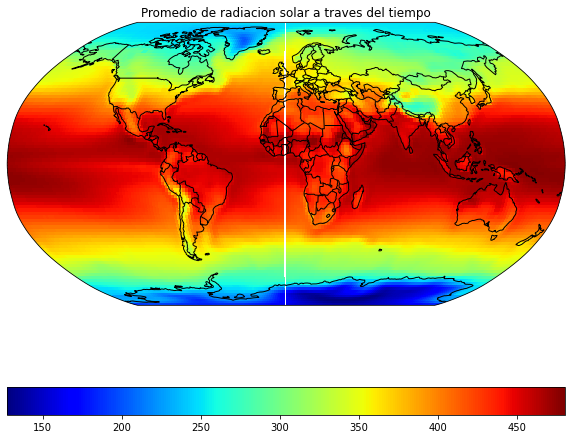

In [115]:
y=SRPlotter(solarradiation.ulwrf)

#### Encaje de lugar con mayor radiacion promedio

In [136]:
x=solarradiation.ulwrf.mean(dim = 'time').argmax(dim=['lat','lon'])

In [152]:
encajes(solarradiation.ulwrf.isel(lat=x['lat'].compute(),lon=x['lon'].compute()))

#### Encaje en lugar con menor radiacion promedio

In [153]:
x=solarradiation.ulwrf.mean(dim = 'time').argmin(dim=['lat','lon'])
encajes(solarradiation.ulwrf.isel(lat=x['lat'].compute(),lon=x['lon'].compute()))

Notese que existe una gran diferencia entre la forma de estos encajes

### Runnof de agua

In [107]:
def waterPlotter(data):
  import warnings
  warnings.filterwarnings("ignore")
  '''Plottea la media de runof de agua'''
  fig = plt.figure(figsize=(10,10))
  ax = plt.axes(projection=ccrs.Robinson())
  ax.set_global()
  cl = ax.coastlines()
  longitude = data.lon
  latitude = data.lat
  dataarray = data.mean(dim = 'time').compute()
  mesh = ax.pcolormesh(longitude, latitude, dataarray, transform = ccrs.PlateCarree(),cmap = 'jet',)
  plt.colorbar(mesh, orientation = 'horizontal')
  plt.title('Media anual de runnof de agua')
  ax.add_feature(cf.BORDERS)
  return fig

#### Mapa

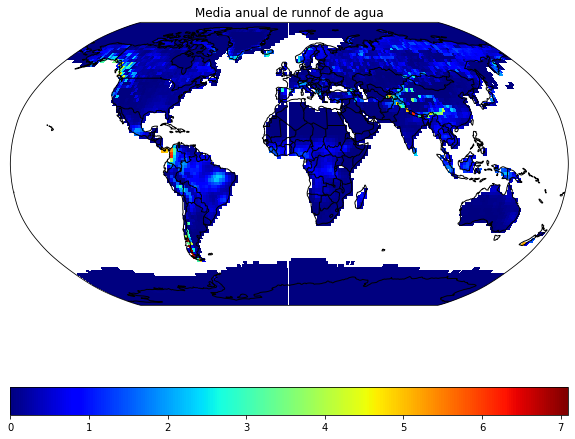

In [85]:
x=waterPlotter(runnof2021.runof)

#### Encaje del lugar con mayor runoff de agua promedio

In [151]:
x=runnof2021.runof.mean(dim = 'time').argmax(dim=['lat','lon'])
encajes(runnof2021.runof.isel(lat=x['lat'].compute(),lon=x['lon'].compute()))

No se hace lo mismo con el minimo por que es cero y el encaje no muestra nada